In [1]:
import subprocess
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import seaborn as sns
from itertools import cycle
import colorsys
import re
from matplotlib.ticker import PercentFormatter
from random import shuffle

In [2]:
with open("all_test_results.pkl", "rb") as f:
    all_test_results: pd.DataFrame = pickle.load(f)

In [3]:
grouped_n = 2
all_test_results["trainable_params_grouped"] = grouped_n ** np.round(np.log(all_test_results["trainable_params"]) / np.log(grouped_n))

In [45]:
def min_max(x):
  return x.min(), x.max()

group_keys = ["dataset", "type", "model", "trainable_params_grouped"]

stats = (
    all_test_results
    .groupby(group_keys, as_index=False)
    .agg(min=("test_acc", "min"),
         max=("test_acc", "max"),
         test_acc=("test_acc", "mean"),
         std=("test_acc", "std"))
)

max_points = (
    all_test_results
    .loc[all_test_results.groupby(group_keys[:-1])["test_acc"].idxmax()]
    .assign(max_type="max_point")
)

max_mean_points = (
    stats
    .loc[stats.groupby(group_keys[:-1])["test_acc"].idxmax()]
    .assign(max_type="max_mean_point")
)

def to_percent(key: str):
  def f(x: pd.Series):
    return x[key].map("{:.2%}".format)
  return f

max_values = (
  pd.concat([max_points, max_mean_points])
    .set_index(["dataset", "type", "max_type"])
    .sort_values("test_acc", ascending=False)
    .sort_index(level=["dataset", "type", "max_type"])
    .assign(test_acc_percent=to_percent("test_acc"), std_percent=to_percent("std"))
)

stats.set_index(["dataset", "type"], inplace=True)

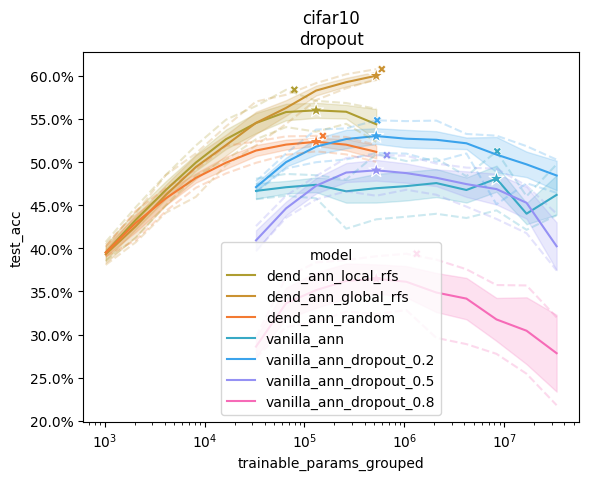

cifar10 - dropout

max points:
                     model test_acc_percent  trainable_params
0      dend_ann_global_rfs           60.81%          595466.0
1       dend_ann_local_rfs           58.42%           79370.0
2  vanilla_ann_dropout_0.2           54.87%          535818.0
3          dend_ann_random           53.06%          153098.0
4              vanilla_ann           51.27%         8530698.0
5  vanilla_ann_dropout_0.5           50.82%          669706.0
6  vanilla_ann_dropout_0.8           39.38%         1333770.0

max mean points:
                     model test_acc_percent  trainable_params_grouped std_percent
0      dend_ann_global_rfs           60.05%                  524288.0       0.48%
1       dend_ann_local_rfs           56.03%                  131072.0       0.88%
2  vanilla_ann_dropout_0.2           53.05%                  524288.0       0.91%
3          dend_ann_random           52.38%                  131072.0       0.45%
4  vanilla_ann_dropout_0.5           49.07%  

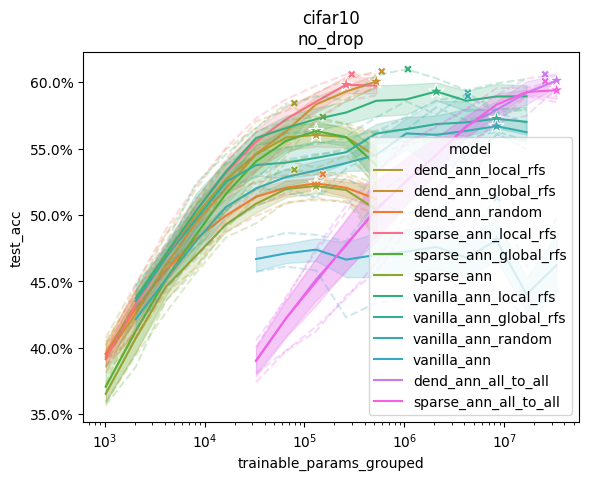

cifar10 - no_drop

max points:
                     model test_acc_percent  trainable_params
0    vanilla_ann_local_rfs           60.98%         1089034.0
1      dend_ann_global_rfs           60.81%          595466.0
2      dend_ann_all_to_all           60.59%        25761290.0
3     sparse_ann_local_rfs           60.59%          297738.0
4    sparse_ann_all_to_all           60.06%        25761290.0
5   vanilla_ann_global_rfs           59.18%         4339210.0
6       vanilla_ann_random           58.94%         4339210.0
7       dend_ann_local_rfs           58.42%           79370.0
8    sparse_ann_global_rfs           57.39%          153098.0
9               sparse_ann           53.40%           79370.0
10         dend_ann_random           53.06%          153098.0
11             vanilla_ann           51.27%         8530698.0

max mean points:
                     model test_acc_percent  trainable_params_grouped std_percent
0      dend_ann_all_to_all           60.12%                3355

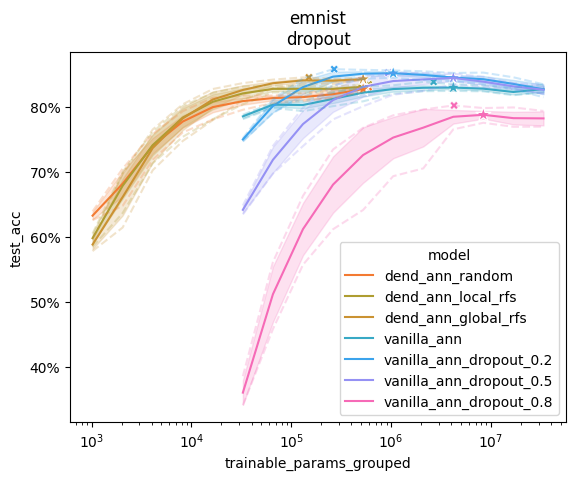

emnist - dropout

max points:
                     model test_acc_percent  trainable_params
0  vanilla_ann_dropout_0.2           85.81%          269322.0
1  vanilla_ann_dropout_0.5           85.25%          936330.0
2      dend_ann_global_rfs           84.54%          150282.0
3              vanilla_ann           83.85%         2661898.0
4       dend_ann_local_rfs           83.47%          595466.0
5          dend_ann_random           83.04%          595466.0
6  vanilla_ann_dropout_0.8           80.22%         4266762.0

max mean points:
                     model test_acc_percent  trainable_params_grouped std_percent
0  vanilla_ann_dropout_0.2           85.19%                 1048576.0       0.31%
1  vanilla_ann_dropout_0.5           84.46%                 4194304.0       0.46%
2      dend_ann_global_rfs           84.27%                  524288.0       0.11%
3       dend_ann_local_rfs           83.10%                  524288.0       0.25%
4              vanilla_ann           82.98%   

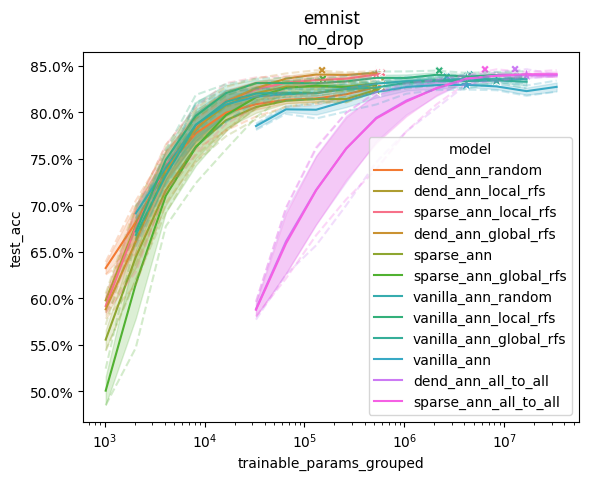

emnist - no_drop

max points:
                     model test_acc_percent  trainable_params
0      dend_ann_all_to_all           84.66%        12880650.0
1    sparse_ann_all_to_all           84.64%         6440330.0
2      dend_ann_global_rfs           84.54%          150282.0
3    vanilla_ann_local_rfs           84.51%         2239242.0
4     sparse_ann_local_rfs           84.27%          595466.0
5       vanilla_ann_random           84.09%         4475658.0
6   vanilla_ann_global_rfs           83.95%         4339210.0
7              vanilla_ann           83.85%         2661898.0
8    sparse_ann_global_rfs           83.63%          153098.0
9       dend_ann_local_rfs           83.47%          595466.0
10         dend_ann_random           83.04%          595466.0
11              sparse_ann           82.69%          595466.0

max mean points:
                     model test_acc_percent  trainable_params_grouped std_percent
0      dend_ann_global_rfs           84.27%                  524

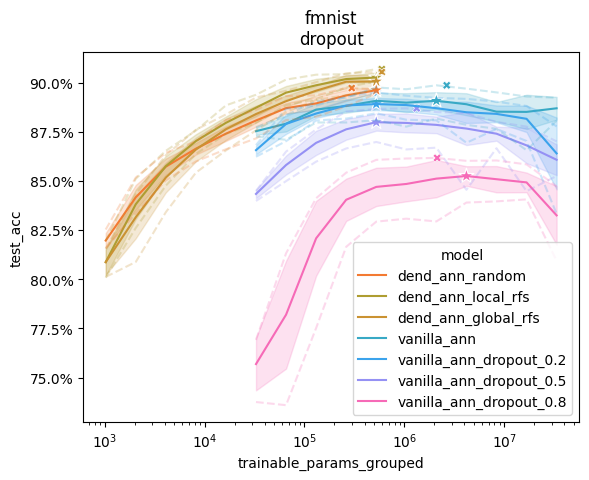

fmnist - dropout

max points:
                     model test_acc_percent  trainable_params
0       dend_ann_local_rfs           90.68%          595466.0
1      dend_ann_global_rfs           90.53%          595466.0
2              vanilla_ann           89.86%         2661898.0
3          dend_ann_random           89.72%          297738.0
4  vanilla_ann_dropout_0.2           89.50%          535818.0
5  vanilla_ann_dropout_0.5           88.69%         1333770.0
6  vanilla_ann_dropout_0.8           86.17%         2134794.0

max mean points:
                     model test_acc_percent  trainable_params_grouped std_percent
0       dend_ann_local_rfs           90.26%                  524288.0       0.25%
1      dend_ann_global_rfs           90.06%                  524288.0       0.33%
2          dend_ann_random           89.61%                  524288.0       0.10%
3              vanilla_ann           89.07%                 2097152.0       0.44%
4  vanilla_ann_dropout_0.2           88.91%   

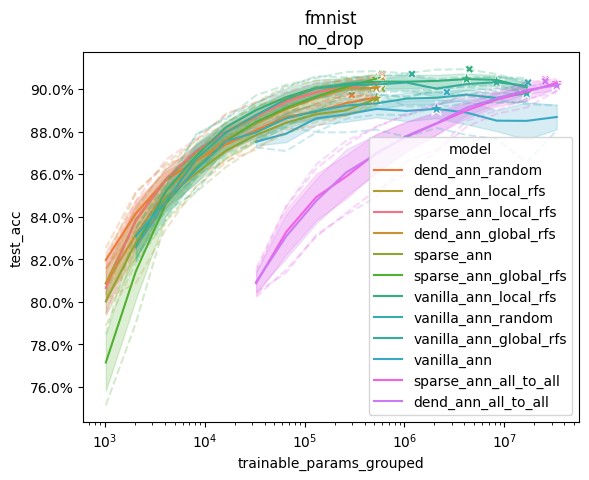

fmnist - no_drop

max points:
                     model test_acc_percent  trainable_params
0    vanilla_ann_local_rfs           90.94%         4475658.0
1   vanilla_ann_global_rfs           90.71%         1189258.0
2    sparse_ann_global_rfs           90.68%          595466.0
3       dend_ann_local_rfs           90.68%          595466.0
4     sparse_ann_local_rfs           90.60%          595466.0
5      dend_ann_global_rfs           90.53%          595466.0
6    sparse_ann_all_to_all           90.45%        25761290.0
7      dend_ann_all_to_all           90.37%        25761290.0
8       vanilla_ann_random           90.31%        17339914.0
9               sparse_ann           90.03%          595466.0
10             vanilla_ann           89.86%         2661898.0
11         dend_ann_random           89.72%          297738.0

max mean points:
                     model test_acc_percent  trainable_params_grouped std_percent
0    sparse_ann_global_rfs           90.49%                  524

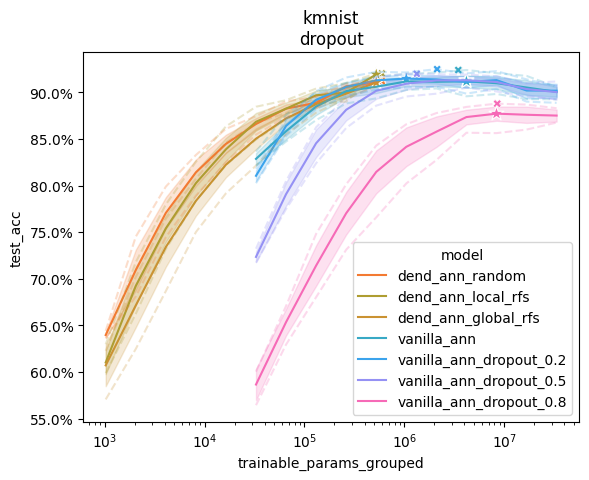

kmnist - dropout

max points:
                     model test_acc_percent  trainable_params
0  vanilla_ann_dropout_0.2           92.49%         2134794.0
1              vanilla_ann           92.40%         3478218.0
2       dend_ann_local_rfs           92.02%          595466.0
3  vanilla_ann_dropout_0.5           91.99%         1333770.0
4      dend_ann_global_rfs           91.31%          595466.0
5          dend_ann_random           91.20%          595466.0
6  vanilla_ann_dropout_0.8           88.79%         8530698.0

max mean points:
                     model test_acc_percent  trainable_params_grouped std_percent
0       dend_ann_local_rfs           91.93%                  524288.0       0.07%
1  vanilla_ann_dropout_0.2           91.48%                 1048576.0       0.46%
2  vanilla_ann_dropout_0.5           91.31%                 4194304.0       0.39%
3              vanilla_ann           91.18%                 4194304.0       0.65%
4          dend_ann_random           91.08%   

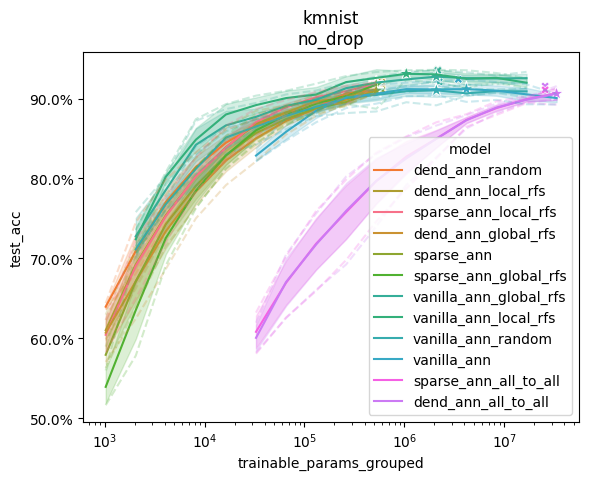

kmnist - no_drop

max points:
                     model test_acc_percent  trainable_params
0    vanilla_ann_local_rfs           93.59%         2172426.0
1   vanilla_ann_global_rfs           93.51%         2172426.0
2              vanilla_ann           92.40%         3478218.0
3    sparse_ann_global_rfs           92.17%          595466.0
4       vanilla_ann_random           92.09%         2239242.0
5     sparse_ann_local_rfs           92.04%          595466.0
6       dend_ann_local_rfs           92.02%          595466.0
7      dend_ann_all_to_all           91.55%        25761290.0
8      dend_ann_global_rfs           91.31%          595466.0
9          dend_ann_random           91.20%          595466.0
10              sparse_ann           91.10%          595466.0
11   sparse_ann_all_to_all           91.09%        25761290.0

max mean points:
                     model test_acc_percent  trainable_params_grouped std_percent
0    vanilla_ann_local_rfs           93.09%                 1048

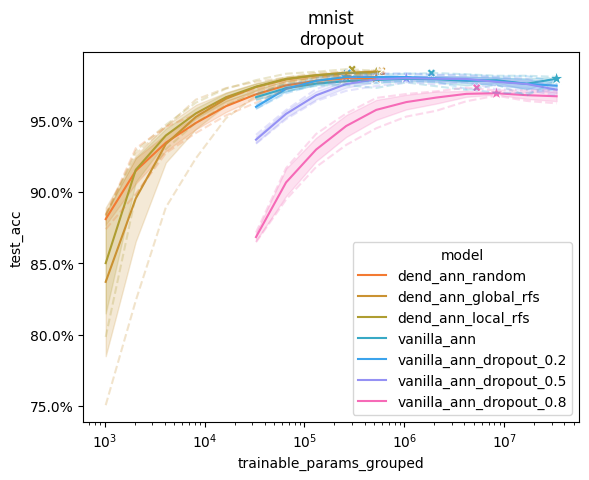

mnist - dropout

max points:
                     model test_acc_percent  trainable_params
0       dend_ann_local_rfs           98.64%          300554.0
1      dend_ann_global_rfs           98.52%          595466.0
2  vanilla_ann_dropout_0.2           98.38%          269322.0
3              vanilla_ann           98.37%         1871242.0
4  vanilla_ann_dropout_0.5           98.36%          535818.0
5          dend_ann_random           98.18%          595466.0
6  vanilla_ann_dropout_0.8           97.34%         5318154.0

max mean points:
                     model test_acc_percent  trainable_params_grouped std_percent
0      dend_ann_global_rfs           98.48%                  524288.0       0.06%
1       dend_ann_local_rfs           98.41%                  524288.0       0.11%
2  vanilla_ann_dropout_0.2           98.10%                  262144.0       0.16%
3          dend_ann_random           98.03%                  524288.0       0.10%
4  vanilla_ann_dropout_0.5           98.01%    

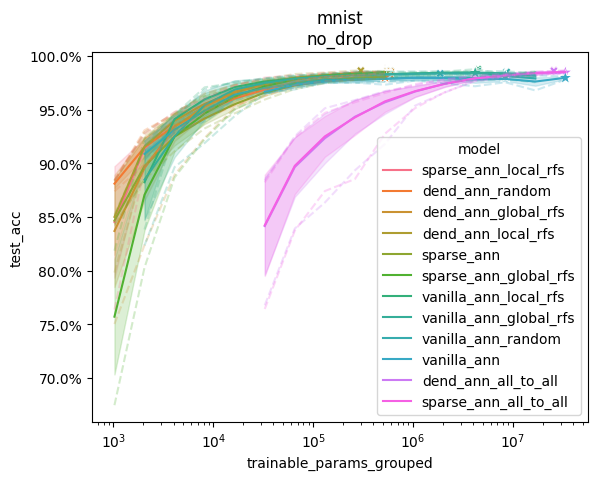

mnist - no_drop

max points:
                     model test_acc_percent  trainable_params
0    vanilla_ann_local_rfs           98.77%         4475658.0
1    sparse_ann_all_to_all           98.66%        25761290.0
2       dend_ann_local_rfs           98.64%          300554.0
3      dend_ann_all_to_all           98.62%        25761290.0
4    sparse_ann_global_rfs           98.60%          595466.0
5   vanilla_ann_global_rfs           98.59%         4475658.0
6     sparse_ann_local_rfs           98.54%          595466.0
7      dend_ann_global_rfs           98.52%          595466.0
8       vanilla_ann_random           98.51%         8672778.0
9              vanilla_ann           98.37%         1871242.0
10              sparse_ann           98.18%          595466.0
11         dend_ann_random           98.18%          595466.0

max mean points:
                     model test_acc_percent  trainable_params_grouped std_percent
0    sparse_ann_all_to_all           98.52%                335544

In [46]:

for dt, data in all_test_results.groupby(["dataset", "type"]):
  keys = all_test_results["model"].unique()
  colors = dict(zip(keys, sns.color_palette("husl", len(keys))))

  if dt[1] == "other_fmnist":
    continue

  fig, ax = plt.subplots()

  sns.lineplot(data, x="trainable_params_grouped", y="test_acc", hue="model", errorbar="sd", palette=colors)
  sns.lineplot(stats.loc[dt], x="trainable_params_grouped", y="min", hue="model", linestyle="--", alpha=0.25, legend=False, palette=colors)
  sns.lineplot(stats.loc[dt], x="trainable_params_grouped", y="max", hue="model", linestyle="--", alpha=0.25, legend=False, palette=colors)
  sns.scatterplot(data=max_values.loc[*dt, "max_point"], x="trainable_params", y="test_acc", hue="model", palette=colors, legend=False, marker="X")
  sns.scatterplot(data=max_values.loc[*dt, "max_mean_point"], x="trainable_params_grouped", y="test_acc", hue="model", palette=colors, legend=False, marker="*", s=125)
  
  plt.xscale("log")
  ax.yaxis.set_major_formatter(PercentFormatter(xmax=1.0))
  plt.title('\n'.join(dt))
  
  plt.show()

  print(
    " - ".join(dt), "",
    "max points:", 
    max_values[["model","test_acc_percent", "trainable_params"]]
      .loc[(*dt, "max_point")]
      .reset_index(drop=True)
      .to_string(),
    "\nmax mean points:", 
    max_values[["model", "test_acc_percent", "trainable_params_grouped", "std_percent"]]
      .loc[(*dt, "max_mean_point")]
      .reset_index(drop=True)
      .to_string(),
    sep='\n')

In [6]:
data1 = all_test_results[all_test_results["file_name"] == "fmnist_1_layer_noise.png"]
